In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt


In [3]:
# Load backtest results
bt = pd.read_csv('/content/drive/MyDrive/LLM_POC_Study_2025_v2/backtest_by_interval.csv')
bt.head()

,year_t,year_t1,generation,gender,race,JSD_hat,JSD_trans,JSD_margin,RMSE_hat
0,2008,2010,Baby Boomer,Female,Black,0.026327,0.029073,0.024920,0.105415
1,2008,2010,Baby Boomer,Female,Other,0.046866,0.060830,0.035672,0.087977
2,2008,2010,Baby Boomer,Female,White,0.002459,0.004629,0.003380,0.034876
3,2008,2010,Baby Boomer,Male,Black,0.011745,0.031075,0.017575,0.087245
4,2008,2010,Baby Boomer,Male,Other,0.071739,0.133082,0.029777,0.133487


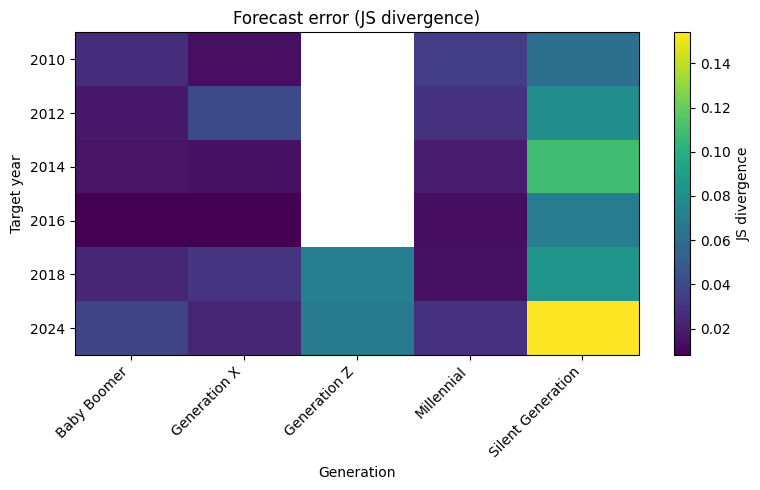

In [4]:


# Example: aggregate by (year_t1, generation)
df = bt.copy()
df["year"] = df["year_t1"]  # evaluate at target year
mat = df.pivot_table(index="year", columns="generation", values="JSD_hat", aggfunc="mean").sort_index()

fig, ax = plt.subplots(figsize=(8, 5))
im = ax.imshow(mat.values, aspect="auto", interpolation="nearest")
ax.set_xticks(range(len(mat.columns))); ax.set_xticklabels(mat.columns, rotation=45, ha="right")
ax.set_yticks(range(len(mat.index)));   ax.set_yticklabels(mat.index)
ax.set_xlabel("Generation"); ax.set_ylabel("Target year"); ax.set_title("Forecast error (JS divergence)")

cbar = plt.colorbar(im, ax=ax)
cbar.set_label("JS divergence")
plt.tight_layout()
plt.show()


In [5]:
# Load forecast_2024
fore_df = pd.read_csv('/content/drive/MyDrive/LLM_POC_Study_2025_v2/forecast_2024_from_2022_by_group.csv')
fore_df.head()

,generation,gender,race,p2022_strong_anti,p2022_anti,p2022_pro,p2022_strong_pro,p2024_trans_strong_anti,p2024_trans_anti,p2024_trans_pro,...,p2024_hat_pro,p2024_hat_strong_pro,p2024_obs_strong_anti,p2024_obs_anti,p2024_obs_pro,p2024_obs_strong_pro,JSD_hat_vs_obs,RMSE_hat_vs_obs,JSD_trans_vs_obs,JSD_margin_vs_obs
0,Baby Boomer,Female,Black,0.269629,0.052399,0.273132,0.404840,0.140039,0.225103,0.141790,...,0.244234,0.395684,0.015202,0.259006,0.225681,0.500110,0.058082,0.119945,0.034362,0.110322
1,Baby Boomer,Female,Other,0.000000,0.259598,0.000000,0.740402,0.102294,0.163901,0.132952,...,0.074125,0.617216,0.236990,0.066499,0.024520,0.671991,0.063058,0.131970,0.045887,0.104538
2,Baby Boomer,Female,White,0.170719,0.212772,0.077741,0.538769,0.139576,0.256346,0.082253,...,0.098064,0.477996,0.211463,0.224994,0.082104,0.481439,0.001946,0.026740,0.004624,0.002369
3,Baby Boomer,Female,NaN,0.000000,0.000000,0.622291,0.377709,0.059570,0.206435,0.179748,...,0.210768,0.621696,0.136181,0.000000,0.078881,0.784937,0.079422,0.132451,0.099330,0.066921
4,Baby Boomer,Male,Black,0.131809,0.211450,0.218555,0.438186,0.142045,0.182462,0.267553,...,0.249231,0.377191,0.110605,0.220600,0.273385,0.395410,0.002729,0.029424,0.001949,0.006066


In [ ]:
# Build a tidy df for one subgroup (e.g., all years for Millennial / Female / White)
GEN, GENDER, RACE = "Millennial", "Female", "White"
sub = []
for (g,y), p in p_cs.items():  # observed margins
    if g == (GEN, GENDER, RACE):
        sub.append({"year": y, "type": "Observed", "p": p})

# Add your model’s forecasts per year (hat) — if you saved them in a CSV, load and filter here
# Example: suppose you created 'forecast_2024_from_2022_by_group.csv' etc.
# For a quick demo, we’ll synthesize a dict 'p_hat' keyed by (g, year).
p_hat = {}  # fill with your predictions, e.g., from backtests

# Build a plot per category
CATS = ["strong_anti","anti","pro","strong_pro"]
fig, axes = plt.subplots(2, 2, figsize=(10, 6), sharex=True)
axes = axes.ravel()

years = sorted({r["year"] for r in sub})
for k, cat in enumerate(CATS):
    ax = axes[k]
    y_obs = []
    for y in years:
        p = next((r["p"] for r in sub if r["year"]==y), None)
        y_obs.append(p[k] if p is not None else np.nan)
    ax.plot(years, y_obs, marker="o", label="Observed")

    # If you have model predictions year by year:
    if len(p_hat):
        y_hat = [p_hat[((GEN,GENDER,RACE),y)][k] if ((GEN,GENDER,RACE),y) in p_hat else np.nan for y in years]
        ax.plot(years, y_hat, marker="s", linestyle="--", label="Forecast")

    ax.set_title(cat)
    ax.set_ylabel("Share")
    if k >= 2: ax.set_xlabel("Year")
    ax.grid(alpha=0.3)
    if k == 0: ax.legend(frameon=False)

fig.suptitle(f"Margins over time — {GEN}, {GENDER}, {RACE}")
plt.tight_layout(); plt.show()
